# Featurization and Model Tuning Project

## Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

### Domain:
Cement manufacturing

### Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Attribute Information:
 Cement : measured in kg in a m3 mixture
 Blast : measured in kg in a m3 mixture
 Fly ash : measured in kg in a m3 mixture
 Water : measured in kg in a m3 mixture
 Superplasticizer : measured in kg in a m3 mixture
 Coarse Aggregate : measured in kg in a m3 mixture
 Fine Aggregate : measured in kg in a m3 mixture
 Age : day (1~365)
 Concrete compressive strength measured in MPa

### Learning Outcomes:
 Exploratory Data Analysis
 Building ML models for regression
 Hyper parameter tuning

### Objective:
Modeling of strength of high performance concrete using Machine Learning

### Steps and tasks:

#### 1. Deliverable -1 (Exploratory data quality report reflecting the following) (20 marks)
    a. Univariate analysis (5 marks) 
        i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers
    b. Multivariate analysis (5 marks) 
        i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes
    c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation (10 marks)

#### 2. Deliverable -2 (Feature Engineering techniques) (15 marks)
    a. Identify opportunities (if any) to create a composite feature, drop a feature etc. (5 marks)
    b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks)
    c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength (5 marks)

#### 3. Deliverable -3 (create the model ) ( 15 marks)
    a. Obtain feature importance for the individual features and present your findings

#### 4. Deliverable -4 (Tuning the model) (20 marks)
    a. Algorithms that you think will be suitable for this project (5 marks)
    b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)
    c. Model performance range at 95% confidence level (10 marks)


In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [484]:
concrete_data = pd.read_csv('concrete.csv')
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## 1. Deliverable -1 (Exploratory data quality report reflecting the following) (20 marks)
### a. Univariate analysis (5 marks) 


In [485]:
# Data types
concrete_data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

- All attributes except age are float. 
- Age is an integer datatype
- There are no missing values 

In [486]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [487]:
# Description of independent attributes
concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### 1. cement
- The attribute cement represents the amount of cement in Kg per meter cube mixture
- Range = 102 to 540 Kg per m3
- Mean = 281.168, Median = 272.9
- Standard deviaion = 104.506, 1st Quartile = 192.375 and 3rd Quartile = 350.0
- Distribution seems to be multimodal normally distributed with skewness on the right
- No outliers

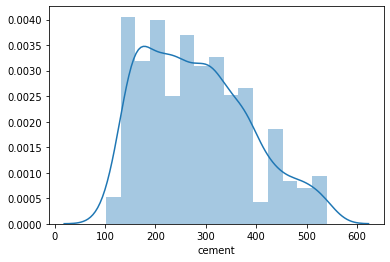

In [488]:
sns.distplot(concrete_data['cement']);

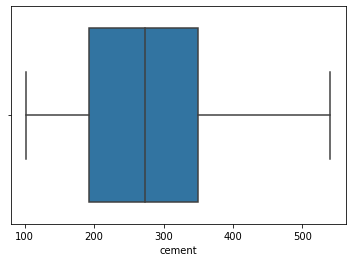

In [489]:
sns.boxplot(concrete_data['cement']);

#### 2. slag
- The attribute slag represents the amount of Blast furnace slag in Kg per meter cube mixture
- Range = 0 to 359.4 Kg per m3
- Mean = 73.896, Median = 22.0
- Standard deviaion = 86.279, 1st Quartile = 0 and 3rd Quartile = 142.95
- Distribution seems to be non-uniform with most values as 0. Meaning mostly slag is not used in the mixture.
- There are some outliers on the right

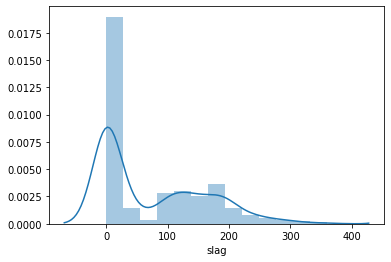

In [490]:
sns.distplot(concrete_data['slag']);

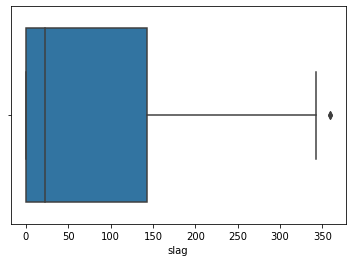

In [491]:
sns.boxplot(concrete_data['slag']);

#### 3. ash
- The attribute ash represents the amount of Fly ash in Kg per meter cube mixture
- Range = 0 to 200.1 Kg per m3
- Mean = 54.188, Median = 0
- Standard deviaion = 63.997, 1st Quartile = 0 and 3rd Quartile = 118.3
- Distribution seems to be non-uniform with most values as 0
- Even the median is also 0. Meaning Fly ash is majorly not used in the mixture.
- No outliers

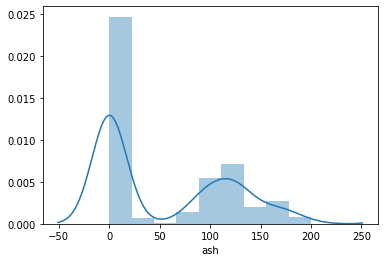

In [492]:
sns.distplot(concrete_data['ash']);

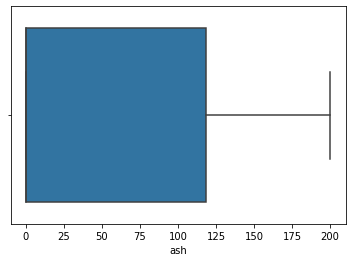

In [493]:
sns.boxplot(concrete_data['ash']);

#### 4. water
- The attribute water represents the amount of water in Kg per meter cube mixture
- Range = 121.8 to 247 Kg per m3
- Mean = 181.567, Median = 185
- Standard deviaion = 21.354, 1st Quartile = 164.9 and 3rd Quartile = 192
- Distribution seems to be normally distributed
- There are some outliers on both sides

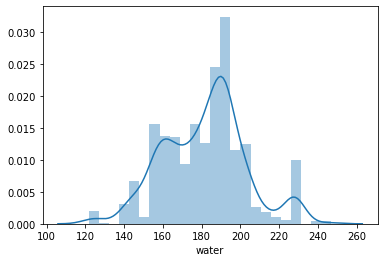

In [494]:
sns.distplot(concrete_data['water']);

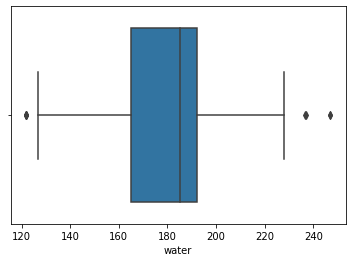

In [495]:
sns.boxplot(concrete_data['water']);

#### 5. superplastic
- The attribute superplastic represents the amount of superplasticizer in Kg per meter cube mixture
- Range = 0 to 32.2 Kg per m3
- Mean = 6.2, Median = 6.4
- Standard deviaion = 5.97, 1st Quartile = 0 and 3rd Quartile = 10.2
- Distribution seems to be multimodal normal distributed with skewness on the right except for the 0 values.
- More than 25% of the times, superplasticizer is not used.
- There are outliers on the right

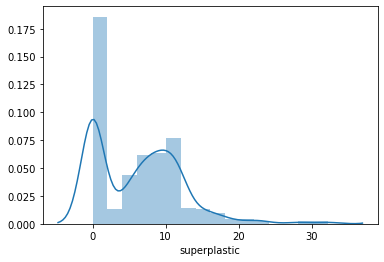

In [496]:
sns.distplot(concrete_data['superplastic']);

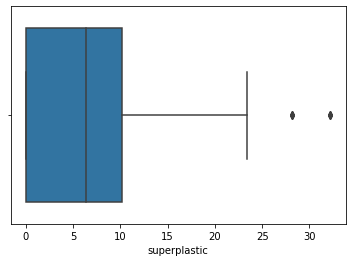

In [497]:
sns.boxplot(concrete_data['superplastic']);

#### 6. coarseagg
- The attribute coarseagg represents the amount of Coarse Aggregate in Kg per meter cube mixture
- Range = 801 to 1145 Kg per m3
- Mean = 972.919, Median = 968
- Standard deviaion = 77.75, 1st Quartile = 932 and 3rd Quartile = 1029.4
- Distribution seems to be normaly distributed with skewness on the left
- No outliers

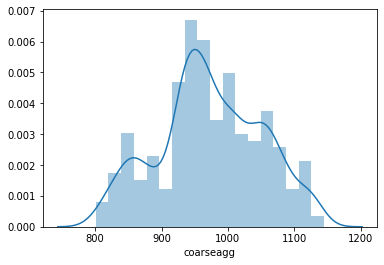

In [498]:
sns.distplot(concrete_data['coarseagg']);

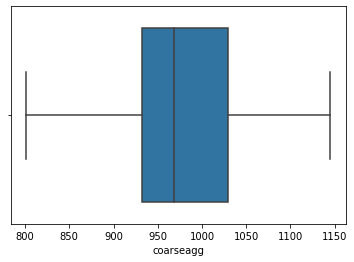

In [499]:
sns.boxplot(concrete_data['coarseagg']);

#### 7. fineagg
- The attribute fineagg represents the amount of Fine Aggregate in Kg per meter cube mixture
- Range = 594 to 992.6 Kg per m3
- Mean = 773.58, Median = 779.5
- Standard deviaion = 80.156, 1st Quartile = 730.95 and 3rd Quartile = 824.0
- Distribution seems to be normaly distributed
- There are outliers on the right

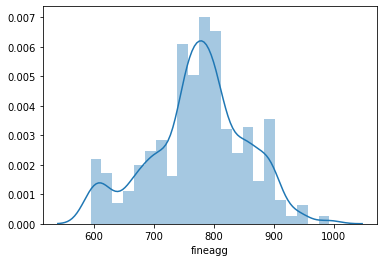

In [500]:
sns.distplot(concrete_data['fineagg']);

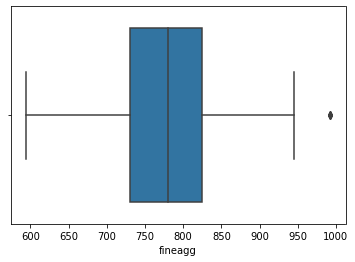

In [501]:
sns.boxplot(concrete_data['fineagg']);

#### 8. age
- The attribute age represents the amount of Age in number of days from 1 to 365
- Range = 1 to 365 days
- Mean = 45.66, Median = 28
- Standard deviaion = 63.17, 1st Quartile = 7 and 3rd Quartile = 56
- Distribution seems to be normaly distributed with high skewness on the right
- There are lots of outliers on the right. 

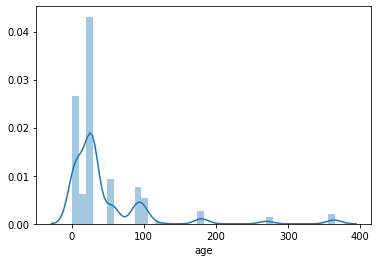

In [502]:
sns.distplot(concrete_data['age']);

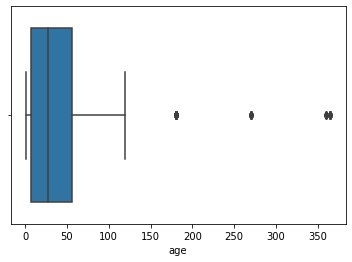

In [503]:
sns.boxplot(concrete_data['age']);

#### Target Variable: strength
- The attribute strength represents the Concrete compressive strength measured in MPa
- Range = 2.33 to 82.6 MPa
- Mean = 35.818, Median = 34.445
- Standard deviaion = 16.706, 1st Quartile = 23.71 and 3rd Quartile = 46.135
- Distribution seems to be normaly distributed with slight skewness on the right
- There are few outliers on the right

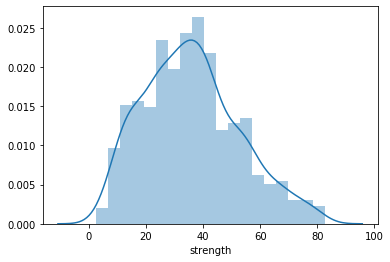

In [504]:
sns.distplot(concrete_data['strength']);

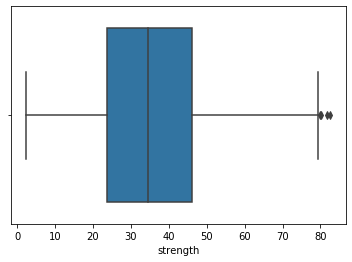

In [505]:
sns.boxplot(concrete_data['strength']);

### b. Multivariate analysis (5 marks) 

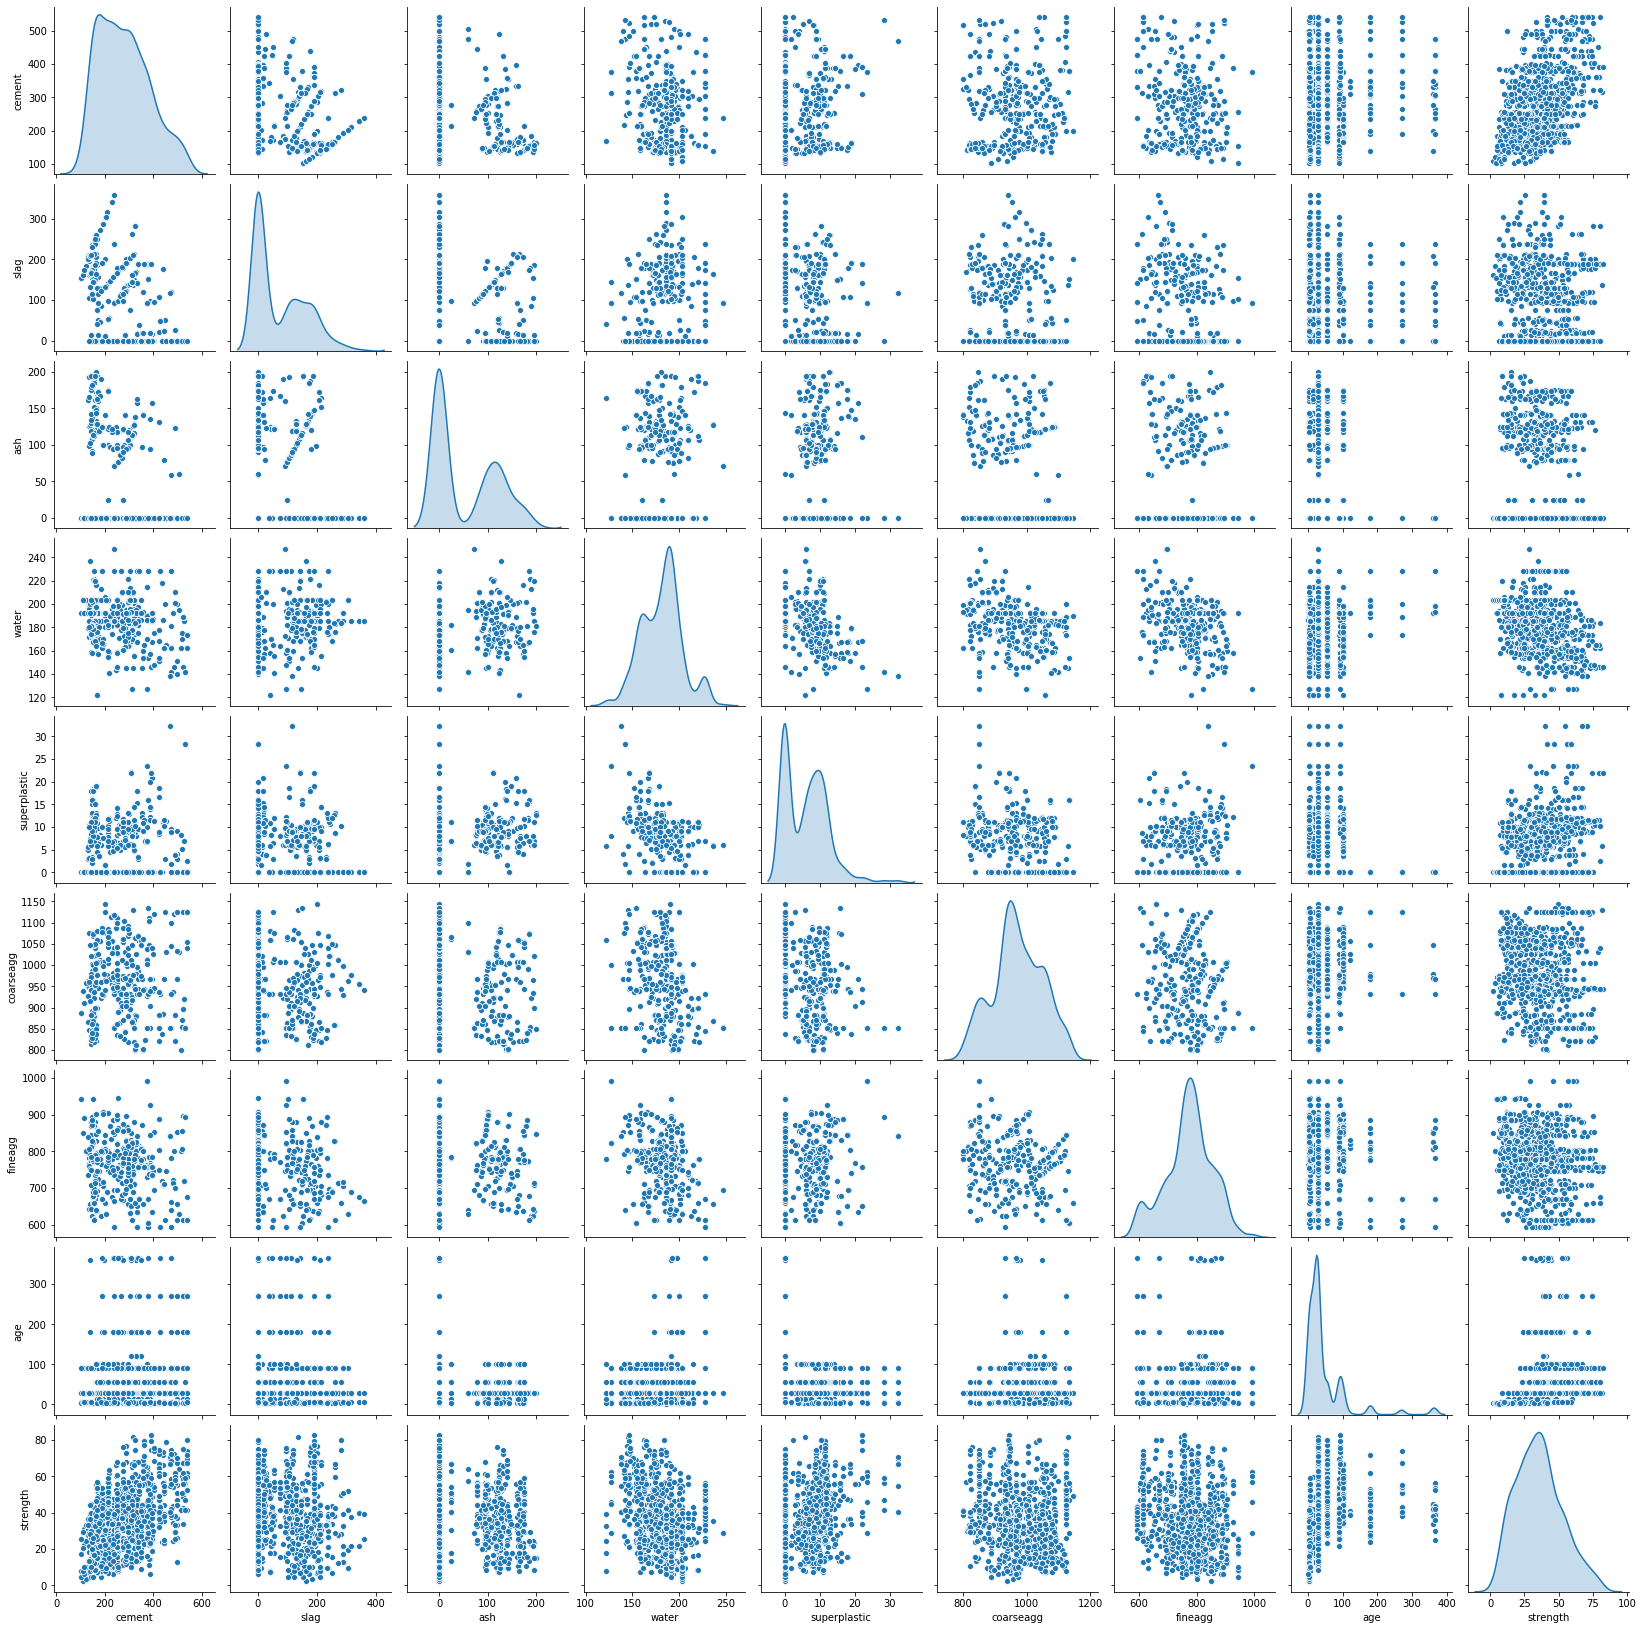

In [506]:
sns.pairplot(concrete_data, diag_kind='kde');

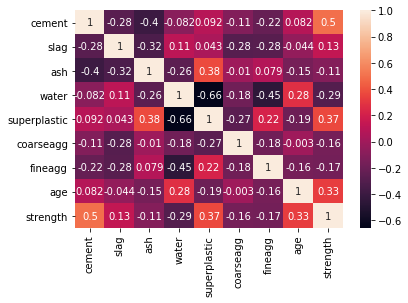

In [507]:
corr = concrete_data.corr()
sns.heatmap(corr, annot=True)

##### Leverage Points

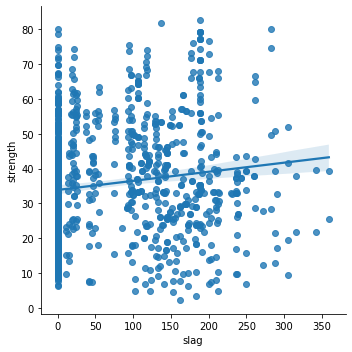

In [508]:
# Using lmplot to find relationship between independent and dependent attributes
sns.lmplot(x='slag', y='strength', data=concrete_data);

In [509]:
concrete_data[concrete_data['slag']>340]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
21,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7,21.92
564,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28,39.70
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


- As per the boxplot earlier we saw slag >340 is an outlier. 
- However, these points can be used to predict the strength as they are falling on the lmplot predictor line. 
- So, we can use them as leverage points. 
- Row 21 and 564 have all attributes same except the age. This indicates the effect of age on the strength.
- Similarly Row 918 and 990 are good leverage points. 

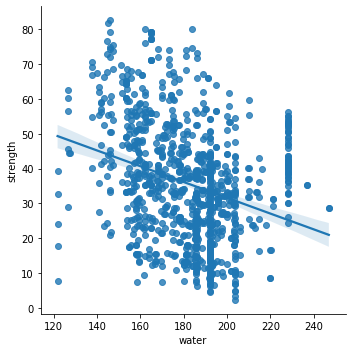

In [510]:
sns.lmplot(x='water', y='strength', data=concrete_data);

In [511]:
concrete_data[concrete_data['water']<126]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


- As per the boxplot earlier we saw water <126, >230 are outliers. 
- However, these points can be used to predict the strength. Above output shows, with all attributes kept constant, when we vary the age, the strength changes accordingly. 
- So, we can use them as leverage points. 

In [512]:
concrete_data[concrete_data['water']>230]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


- Higher amount of water means lower strength, which indicates a good negative correlation
- So, these are leverage points

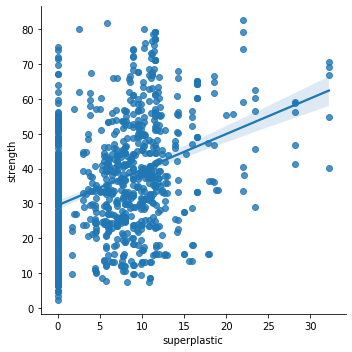

In [513]:
sns.lmplot(x='superplastic', y='strength', data=concrete_data);

In [514]:
concrete_data[concrete_data['superplastic']>25]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


- As per the boxplot earlier we saw superplastic >25 is an outlier 
- However, these points can be used to predict the strength. Above output shows, with all attributes kept constant, when we vary the superplastic, the strength changes accordingly, indicating a good positive correlation. 
- So, we can use them as leverage points. 

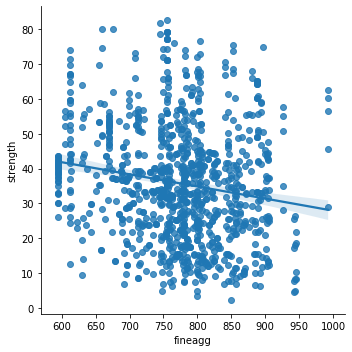

In [515]:
sns.lmplot(x='fineagg', y='strength', data=concrete_data);

In [516]:
concrete_data[concrete_data['fineagg']>944]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.50
439,255.0,0.0,0.0,192.0,0.0,889.8,945.0,3,8.20
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.70
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.00
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.20
645,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28,18.75
727,255.0,0.0,0.0,192.0,0.0,889.8,945.0,7,10.22
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.70


- As per the boxplot earlier we saw fineagg >944 is an outlier 
- However, these points can be used to predict the strength. Above output shows, the strength depends on fineagg, indicating a good positive correlation. 
- So, we can use them as leverage points. 

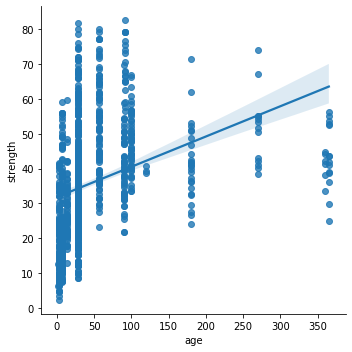

In [517]:
sns.lmplot(x='age', y='strength', data=concrete_data);

In [518]:
concrete_data[concrete_data['age']>350]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
159,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,55.26
198,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
323,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,360,44.70
361,277.0,0.0,0.0,191.0,0.0,968.0,856.0,360,33.70
393,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
448,331.0,0.0,0.0,192.0,0.0,978.0,825.0,360,41.24
465,427.5,47.5,0.0,228.0,0.0,932.0,594.0,365,43.70


##### Findings:
1. The target variable Cocrete compressive strength is majorly dependent on cement, superplastic, age and water
2. Other attributes have lesser correlation with the target variable strength
3. Attributes Water and superplastic are negatively correlated with correlation coefficient = -0.66
4. Water is also negatively correlated with Fine aggregate with corr = -0.45
5. Superplastic is also positively correlated with Fly ash with corr = 0.38
6. Other attributes also have very little correlation among each other

However, the interdependence of the variable doesn't indicate any multicollinearity issue as the correlation coefficients are not too high. 

### c. Outliers and missing value treatment
Pick one strategy to address the presence outliers and missing values and perform necessary imputation (10 marks)

- There are no missing values. 
- Though there are 0 values, but they indicate the absense of that particular ingredient in the mixture and not missing values.
- There are some outliers, which we can impute with the respective quartile values. 
- But, before imputation we should split the data into train and test set.

##### Train Test Split

In [519]:
from sklearn.model_selection import train_test_split

X = concrete_data.drop('strength', axis=1)
y = concrete_data['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180
242,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,28
331,304.0,140.0,0.0,214.0,6.0,895.0,722.0,28
299,198.6,132.4,0.0,192.0,0.0,978.4,825.5,3


In [520]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

##### Outlier Treatment

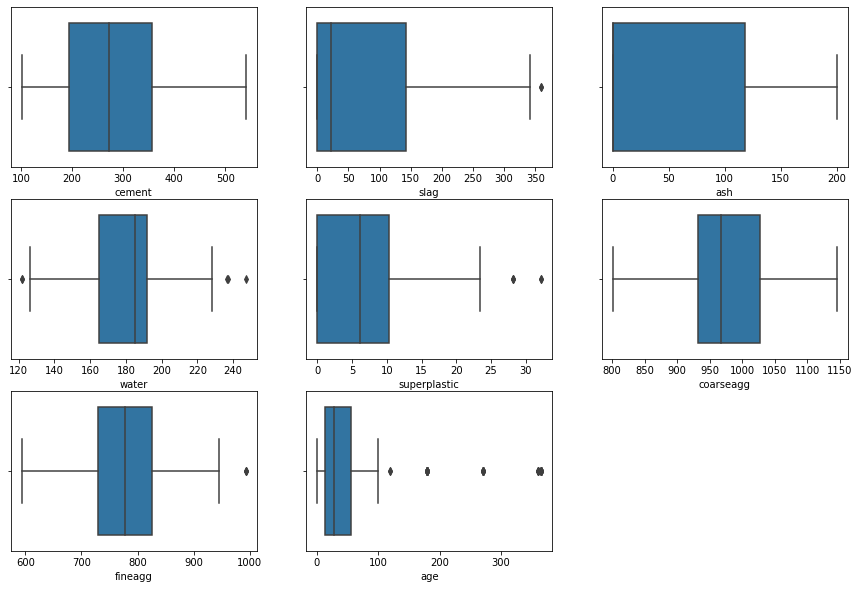

In [419]:
# Visualize the attributes before outlier treatment
plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_train[i])
    pos += 1 

In [420]:
# Majority of the columns have only right outliers, so, Treating the outliers on the right only
for i in X_train.columns:
    q1, q2, q3 = X_train[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = X_train[i] > q3 + 1.5*IQR  # Condition to check if the point is an outlier on the right
    X_train[i] = np.where(a, q3, X_train[i])  # Replace the outlier with q3 (3rd quartile)

C:\Users\amenaria\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


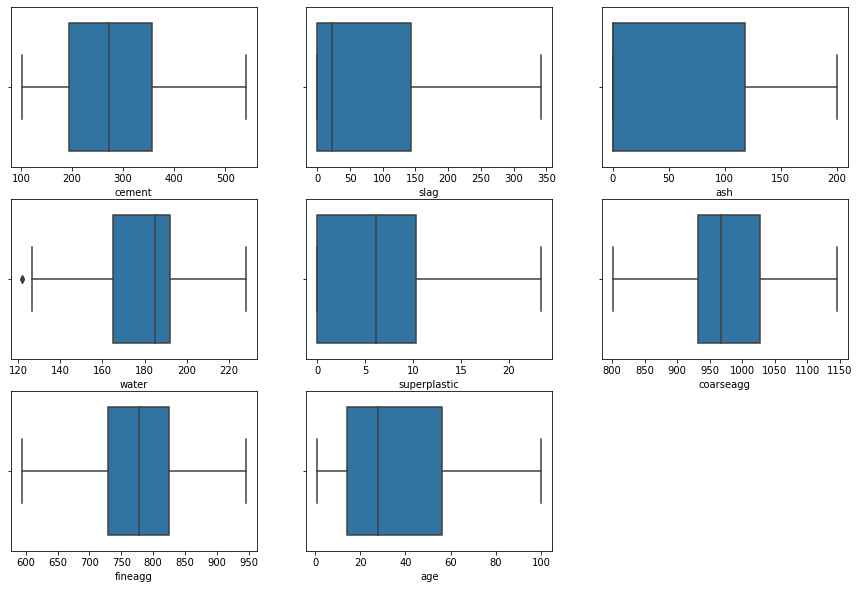

In [421]:
# Visualize the attributes after outlier treatment
plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_train[i])
    pos += 1 

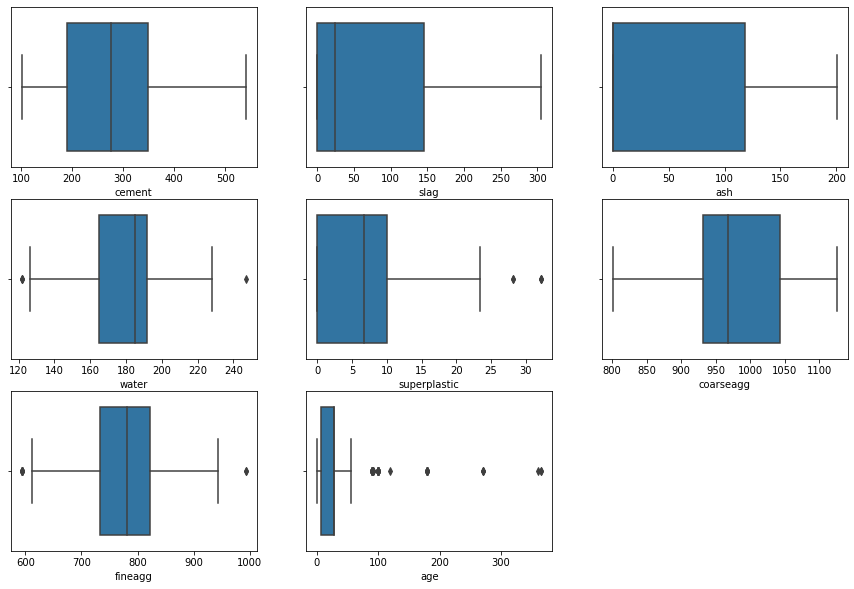

In [521]:
# Similarly we need to treat the outliers in the test data as well - 
plt.figure(figsize=(15,10))
pos = 1
for i in X_test.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_test[i])
    pos += 1 

In [522]:
# Majority of the columns have only right outliers, so, Treating the outliers on the right only
for i in X_test.columns:
    q1, q2, q3 = X_test[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = X_test[i] > q3 + 1.5*IQR  # Condition to check if the point is an outlier on the right
    X_test[i] = np.where(a, q3, X_test[i])  # Replace the outlier with q3 (3rd quartile)

C:\Users\amenaria\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


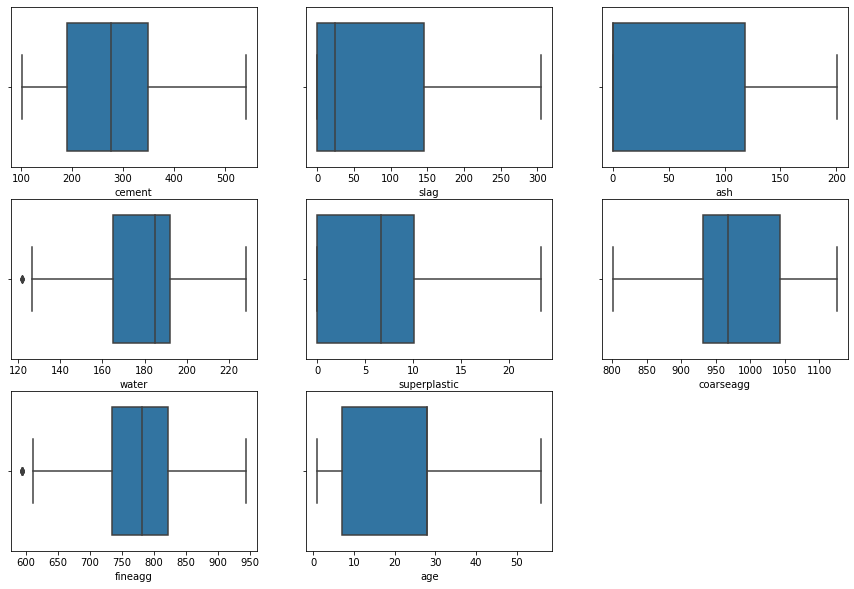

In [523]:
# Test data after outlier treatment
plt.figure(figsize=(15,10))
pos = 1
for i in X_test.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_test[i])
    pos += 1 

## 2. Deliverable -2 (Feature Engineering techniques) (15 marks)
    
### a. Identify opportunities (if any) to create a composite feature, drop a feature etc. (5 marks)

### b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks)

In [524]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [525]:
# Trying a simple Linear model
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

[ 0.11617976  0.10169134  0.08505903 -0.1801281   0.23697809  0.01731149
  0.01608948  0.10905982]
0.6089105600598477
0.5296773538669056


In [526]:
# Trying with a Ridge regression model
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [ 0.11617978  0.10169137  0.08505919 -0.1801293   0.23697115  0.0173113
  0.01608941  0.1090598 ]
0.6089105600577052
0.5296772292813035


In [527]:
# Trying with Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model: [ 0.11599103  0.10146621  0.08492323 -0.18206479  0.22993828  0.01690117
  0.01575627  0.10900984]
0.6089082069411692
0.529551401928285


- As seen in the above Lasso coefficients. None of them have become zero, indicating that all features have some importance
- Since all the features have some relation with the target variable strength, its not possible to drop any feature
- Also, there is not much multicollinearity between any two independent features. Hence, there's not much scope of creating a composite feature here

### c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength (5 marks)

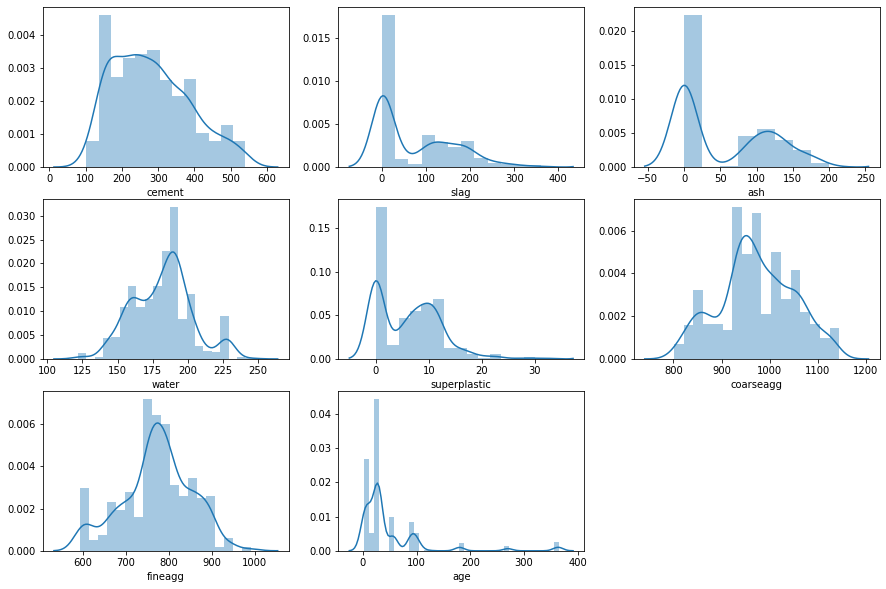

In [528]:
# Visualize the distplots to explore for gaussians
plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3, 3, pos)
    sns.distplot(X_train[i])
    pos += 1 

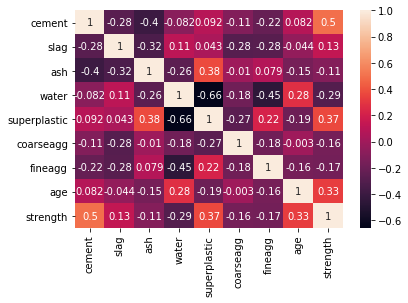

In [529]:
sns.heatmap(corr, annot=True)

##### Findings
- The various distributions, indicate there are atleast 3 - 4 gaussians
- Also, the independent features seem to be quite suitable to predict the strength

## 3. Deliverable -3 (create the model ) ( 15 marks)

### a. Obtain feature importance for the individual features and present your findings

In [530]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=10)
rfr.fit(X_train, y_train)
print('Training accuracy', rfr.score(X_train, y_train))
print('Testing accuracy', rfr.score(X_test, y_test))

Training accuracy 0.9827351983563338
Testing accuracy 0.8728790357884956


In [531]:
print('Feature importance: ') 
imp = pd.Series(rfr.feature_importances_, X_train.columns).sort_values(ascending=False)
print(imp)

Feature importance: 
age             0.330150
cement          0.307977
water           0.121955
superplastic    0.081305
slag            0.064471
fineagg         0.045082
coarseagg       0.028671
ash             0.020390
dtype: float64


##### Findings
- age and cement are the most important features in determining the strength of the mixture
- coreseagg and fly ash are the least important features
- By default, the Random Forest model seems to overfit with 98 % training accuracy and only 87 % test accuracy scores

## 4. Deliverable -4 (Tuning the model) (20 marks)
### a. Algorithms that you think will be suitable for this project (5 marks)

### b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)

In [532]:
# Using Randomized search CV for hyperparmeter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [538]:
params = {
    'max_depth': randint(5,18),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,10),
    'max_features': randint(1,11),
    "bootstrap": [True, False],
}

In [547]:
ran = RandomizedSearchCV(rfr, params, cv=5, n_jobs=2, random_state=10, refit=True)
ran.fit(X_train, y_train)

print('Training accuracy', ran.score(X_train, y_train))
print('Testing accuracy', ran.score(X_test, y_test))

Training accuracy 0.9006341113211102
Testing accuracy 0.8213687463934872


In [548]:
# Best parameters found by Randomized Search Cross Validation
ran.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 8,
 'min_samples_leaf': 9,
 'min_samples_split': 5}

##### Observations
- With Randomized Search CV, the testing accuracy has reduced, but we have avoided overfitting the model
- This model is a more generic model than the default model

### c. Model performance range at 95% confidence level (10 marks)

In [549]:
from sklearn.model_selection import cross_val_score

In [551]:
results = cross_val_score(rfr, X, y, cv=50, n_jobs=2)
results.sort()
results

array([0.73059581, 0.75092282, 0.76430227, 0.79511088, 0.79945256,
       0.8053391 , 0.85455872, 0.86032578, 0.87795012, 0.88018742,
       0.8810363 , 0.89544544, 0.89617106, 0.90004296, 0.90011427,
       0.90146015, 0.90742146, 0.91107824, 0.91183772, 0.91485697,
       0.9193362 , 0.92102759, 0.92224127, 0.92353597, 0.92663079,
       0.92781295, 0.93045609, 0.933915  , 0.93505608, 0.93755483,
       0.93999856, 0.93999932, 0.94385966, 0.94413572, 0.9453757 ,
       0.94717273, 0.94845317, 0.95035239, 0.95369999, 0.95467697,
       0.95531926, 0.95955692, 0.9597054 , 0.96074468, 0.96533015,
       0.96930789, 0.96953127, 0.97063107, 0.97224735, 0.97517151])

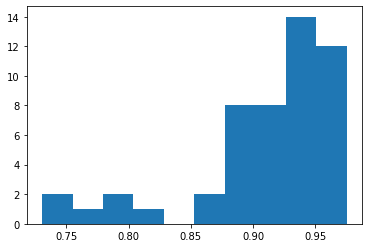

In [552]:
# plot scores
plt.hist(results, bins=10)
plt.show()

In [553]:
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('At %.1f confidence interval, the model accuracy score is between %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

At 95.0 confidence interval, the model accuracy score is between 75.4% and 97.2%


## Conclusion:

- Random Forest regressor is a good model for this problem and it gives 91.5% test accuracy.
- Using RandomizedSearch cross validation technique, we can reduce overfitting and generalize the model to give 90% training accuracy and 82% test accuracy.
- Overall at 95% confidence interval, we can claim the model accuracy to be between 75.4% and 97.2%